# Projeto de AC2

## Sobre

Aqui ficará uma descrição sobre o projeto e sobre o dataset utilizado, com o objetivo que queremos atingir.



## Integrantes

- Vinícius Lourenço Claro Cardoso (180618)
- Gal Bronstein (160870)
- Karine Pistili (171469)
- Lucas Mendes (171070)
- Michel Siqueira (171118)
- Deiski Iuri Aoki (191471)

## Analise Exploratória

Para começar, vamos importar algumas bibliotecas que serão utilizadas ao decorrer da analise exploratória dos dados.

In [1]:
#Leitura dos módulos
from __future__ import print_function

import pandas as pd
from pandas import Series,DataFrame

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1000)

import seaborn as sns
import matplotlib.pyplot as plt

import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.optimizers import Adam

from sklearn.neighbors import KNeighborsClassifier

### Import do Dataset

Abaixo, vamos começar importando o dataset com os dados dos vinhos para começarmos a analisar.

In [2]:
#Leitura do arquivo CSV
wine_data_set = pd.read_csv("https://raw.githubusercontent.com/H4ad/facens-ac2-inteligencia-computacional/main/winequality-red.csv",sep=";",header=0)

### Primeiras Impressões

Após importar, podemos começar entendendo o formato dos dados desse dataset usando os comandos abaixo.


In [3]:
display(wine_data_set.head(n=5))
display(wine_data_set.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Valores faltando

As vezes, um dataset pode conter algum valor valor vázio/nulo em decorrência de estar faltando, para verificarmos se está tudo ok, podemos executar o código abaixo.

In [4]:
wine_data_set.isna().sum()/wine_data_set.shape[0]

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

Como exemplificado acima, nosso dataset está completo e não há nenhum valor faltando.

### Valores duplicados

Assim como o caso de valores faltando, pode ocorrer de o dataset possuir valores duplicados, e isso é além de atrapalhar a analise dos dados também faz com que seja gasto valores computacionais de forma desnecessária.

Dessa forma, para verificamos se existe valores duplicados, usamos o comando abaixo:

In [5]:
wine_data_set.duplicated().sum()

240

E após executar, notamos que temos 240 valores duplicados, o que se comparado com a nossa quantidade total de itens, 1599, é uma soma relevante.

Para remover esses valores duplicados, é bem simples, usamos o comando:

In [6]:
print('Shape antes de remover os dados.')
print(wine_data_set.shape)

wine_data_set_cleaned = wine_data_set.drop_duplicates(inplace=False)

print('\nShape após remover os dados.')
print(wine_data_set_cleaned.shape)

print('\nQuantidade de itens removidos:', (wine_data_set.shape[0] - wine_data_set_cleaned.shape[0]))

Shape antes de remover os dados.
(1599, 12)

Shape após remover os dados.
(1359, 12)

Quantidade de itens removidos: 240


### Quantidade Residual de Açucar

A levedura utiliza dos açucares para produzir álcool etílico e díoxido de carbono, dessa forma, podemos testar a hipótese se a quantidade de açucar afeta qualidade do vinho.

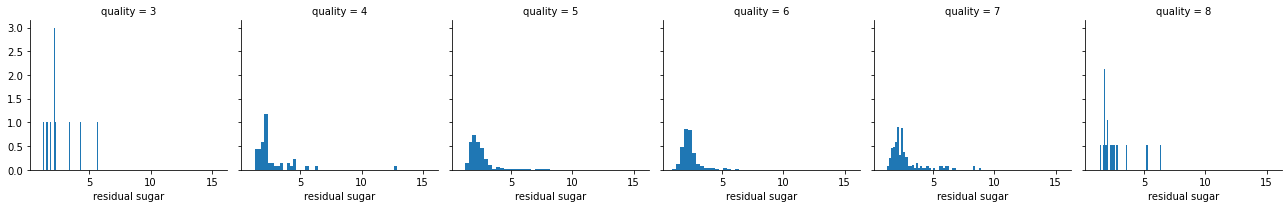

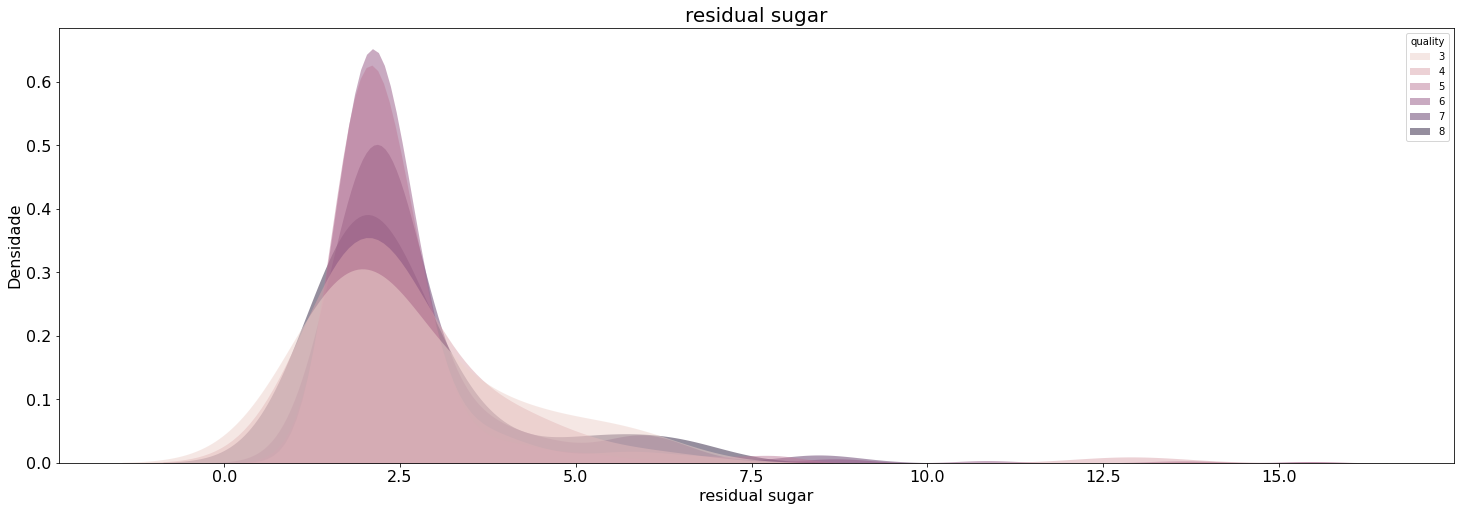

In [7]:
g = sns.FacetGrid(wine_data_set_cleaned, col='quality')
g.map(plt.hist, 'residual sugar', bins=45, density=True)

cnt = 0
max_in_row = 1
continous_cols = ['residual sugar']

for x in continous_cols:
    plt.figure(cnt//max_in_row, figsize=(25,8))
    plt.subplot(1, max_in_row, (cnt)%max_in_row + 1)
    plt.title(x, fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel(x, fontsize=16)
    plt.ylabel('Densidade', fontsize=16)
    sns.kdeplot(data=wine_data_set_cleaned, x=x, hue="quality", fill=True, common_norm=False, alpha=.5, linewidth=0);
    cnt += 1

A distribuição está apontando que quase todos estão com uma quantidade residual abaixo de 5% mas isso não é suficiente para diferenciar um vinho com qualidade 8 de um vinho com qualidade 3.

E o segundo gráfico também nos mostra que os valores estão muito próximos uns dos outros.

A partir dessa análise, poderiamos sem muitos problemas excluir a coluna de açucar residual.

### Quantidade de Álcool

O álcool é o resultado da utilização dos açucares pela levedura, dessa forma, podemos tentar verificar se a quantidade de álcool resultante possui alguma influência capaz de possibilitar a distinção de um vinho 8 de um vinho 3.


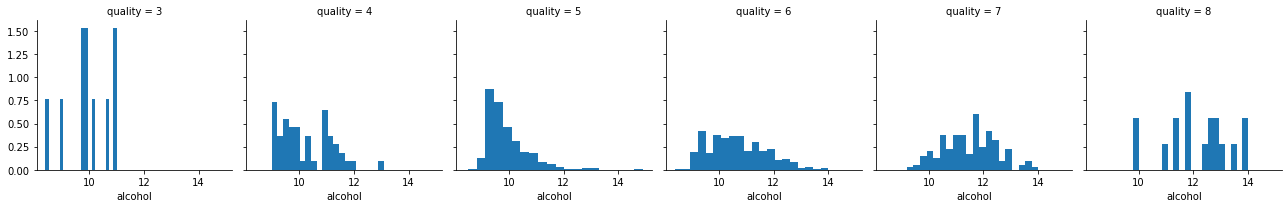

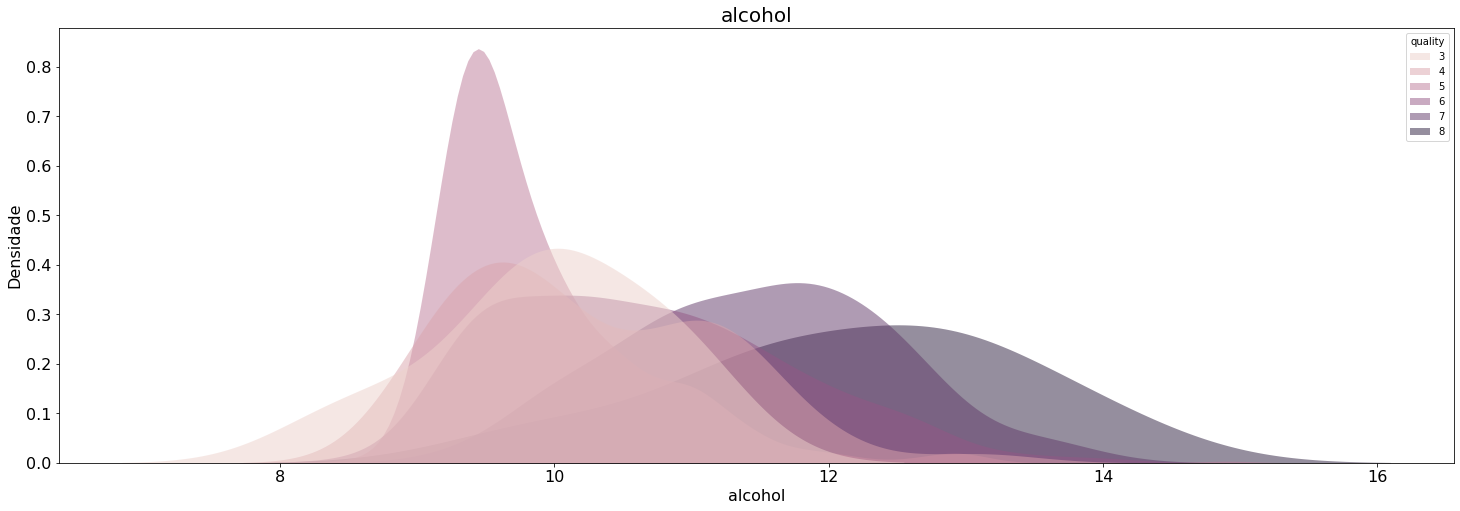

In [8]:
g = sns.FacetGrid(wine_data_set_cleaned, col='quality')
g.map(plt.hist, 'alcohol', bins=20, density=True)

cnt = 0
max_in_row = 1
continous_cols = ['alcohol']

for x in continous_cols:
    plt.figure(cnt//max_in_row, figsize=(25,8))
    plt.subplot(1, max_in_row, (cnt)%max_in_row + 1)
    plt.title(x, fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel(x, fontsize=16)
    plt.ylabel('Densidade', fontsize=16)
    sns.kdeplot(data=wine_data_set_cleaned, x=x, hue="quality", fill=True, common_norm=False, alpha=.5, linewidth=0);
    cnt += 1

O resultado dos gráficos nos mostra que há uma boa dispersão dos dados, diferente da quantidade residual de açucar que não nos permitia diferenciar muito de uma qualidade a outra, a quantidade de álcool já nos mostra que ela pode ser útil para as futuras análises.

E se olharmos agora para o gráfico 2, fica mais evidente que os vinhos com qualidade mais alta possuem um maior teor de álcool. Claro, o objetivo não é dizer se o vinho é de alta qualidade mas sim prever qual seria sua qualidade, baixa ou alta, e com o teor de álcool, vemos que ele pode ser usado para diferenciar a qualidade de vinhos melhor do que se utilizássemos o teor de açucar.

### Analise mais genérica das outras colunas

Para não extender demais a análise, podemos agora rodar o mesmo gráfico utilizado nas análises anteriores para todos as colunas restantes para tentar excluír mais algumas colunas.

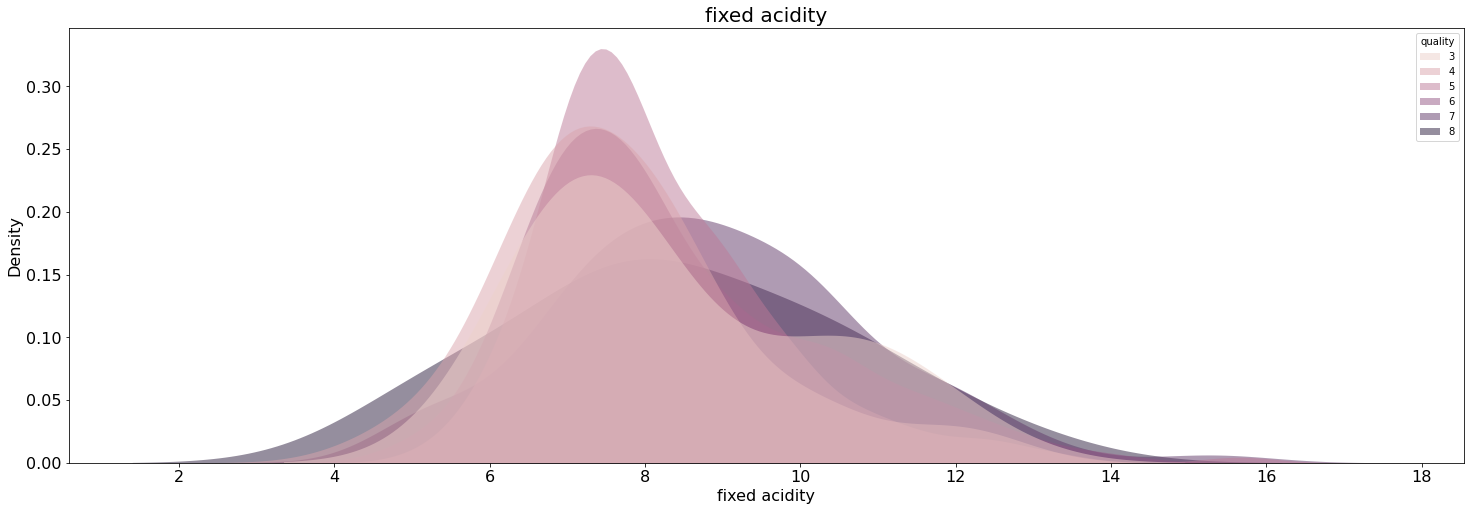

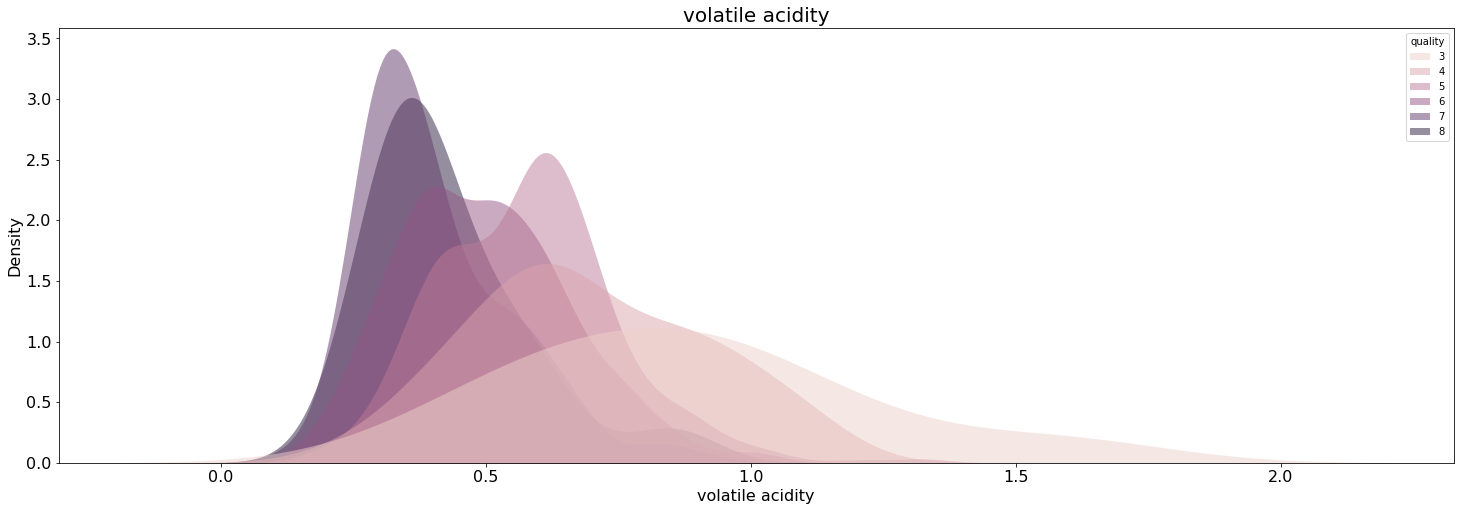

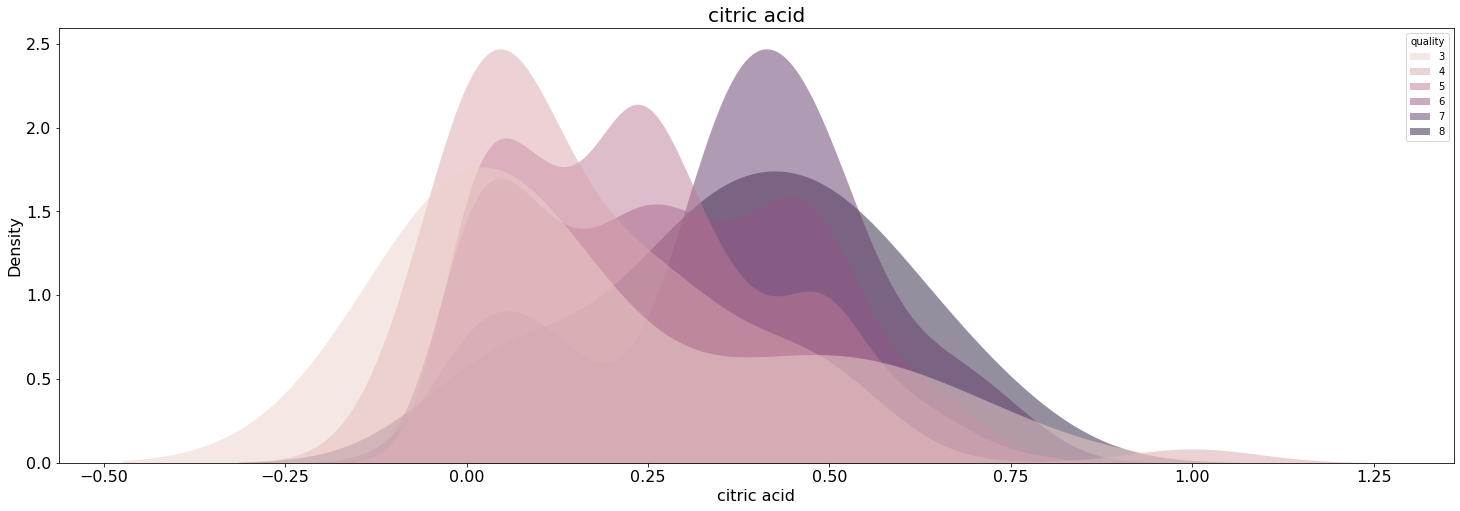

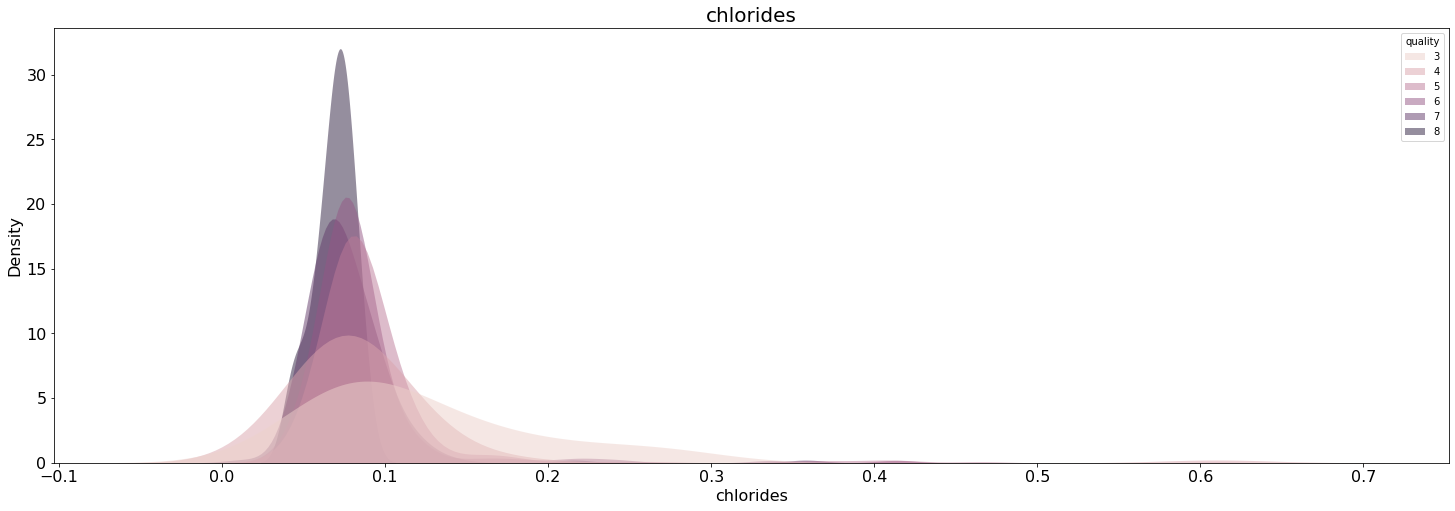

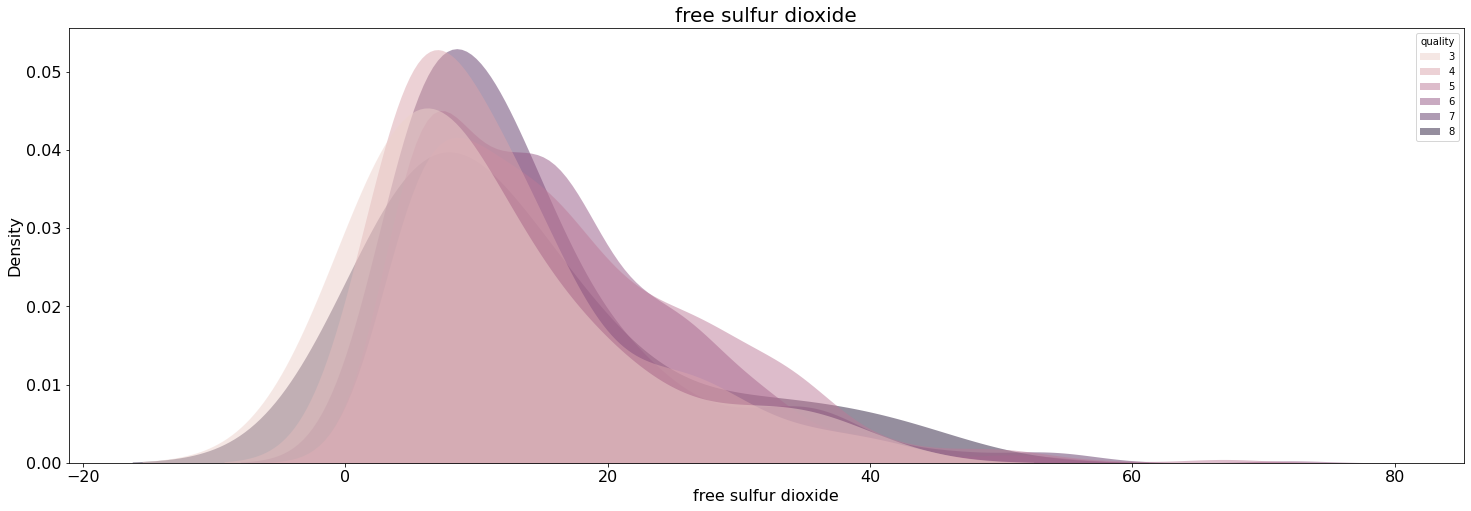

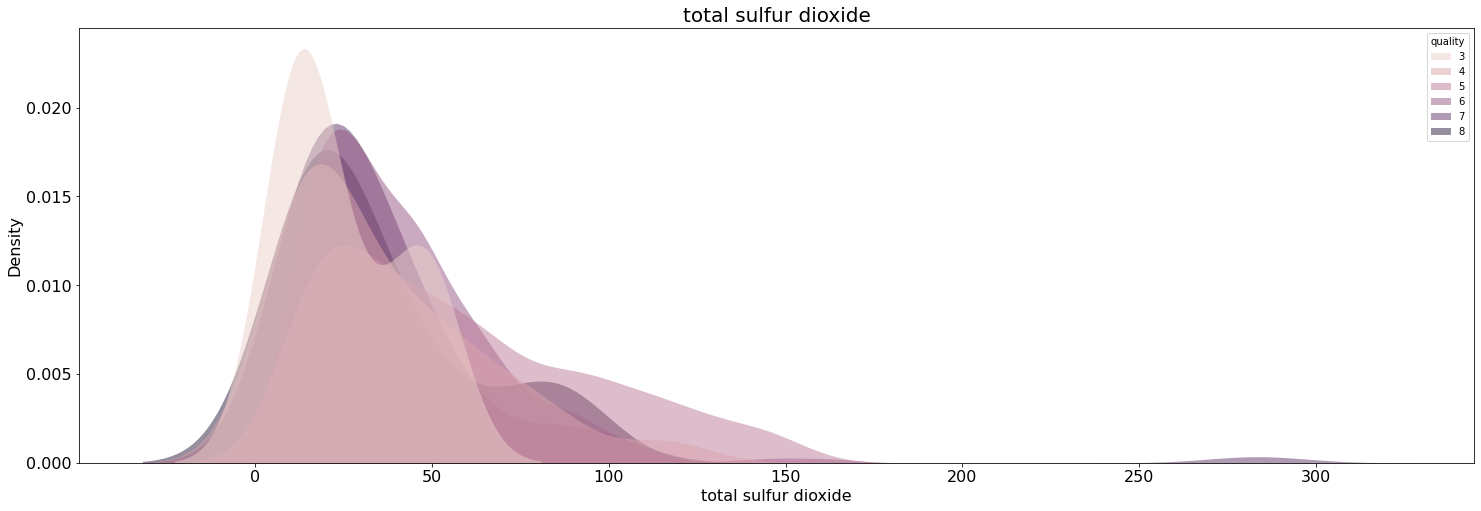

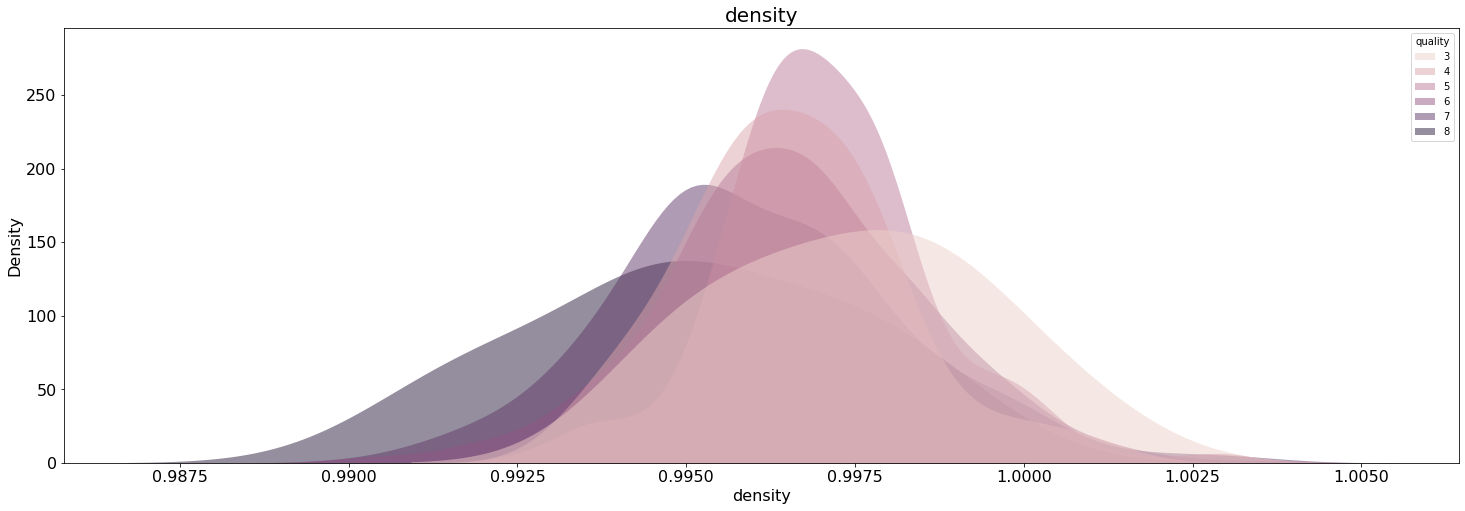

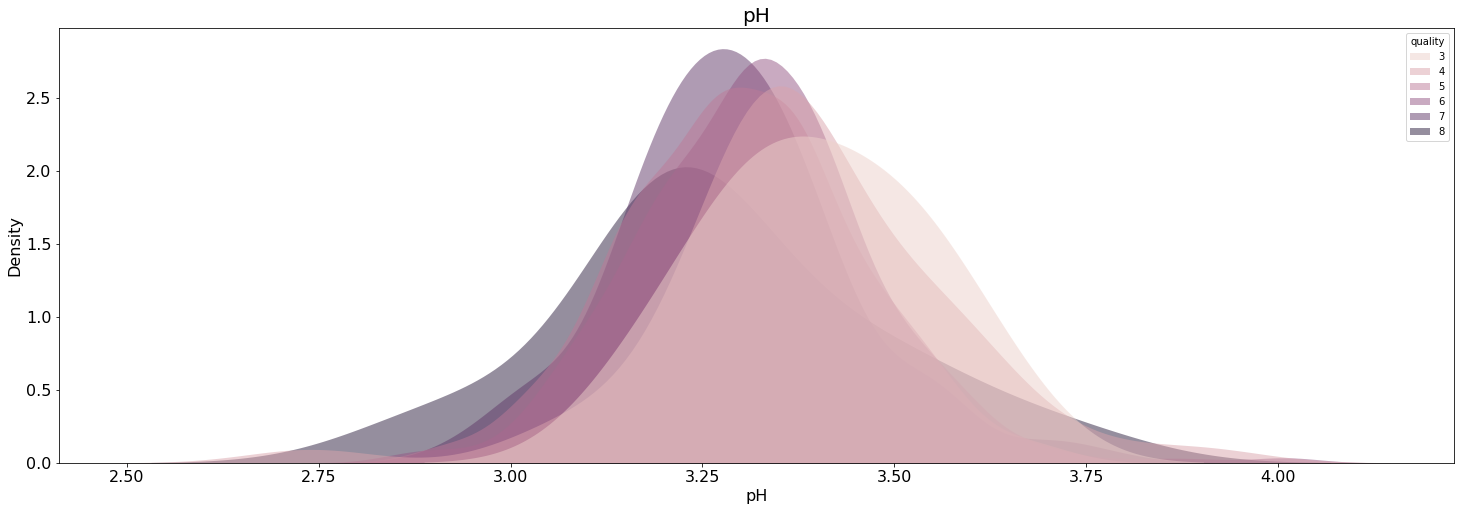

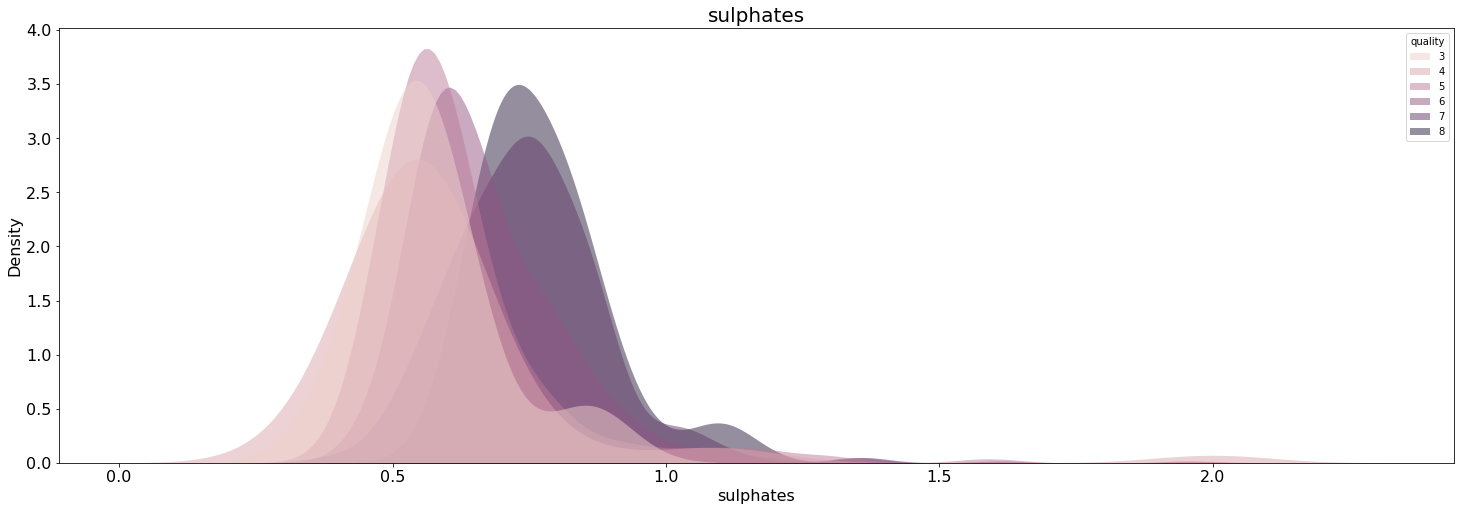

In [9]:
cnt = 0
max_in_row = 1
continous_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide',	'total sulfur dioxide', 'density', 'pH', 'sulphates']

for x in continous_cols:
    plt.figure(cnt//max_in_row, figsize=(25,8))
    plt.subplot(1, max_in_row, (cnt)%max_in_row + 1)
    plt.title(x, fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel(x, fontsize=16)
    plt.ylabel('Density', fontsize=16)
    sns.kdeplot(data=wine_data_set_cleaned, x=x, hue="quality", fill=True, common_norm=False, alpha=.5, linewidth=0);
    cnt += 1

A partir dos gráficos acima, se excluirmos as colunas que possuem uma sobreposição muito alta, podemos ficar com as seguintes colunas:

- Fixed Acidity
- Volatile Acidity
- Citric Acid
- Density
- pH
- Sulphates

### Colunas Resultantes

Dessa forma, a partir da análise exploratória, iremos excluir as seguintes colunas:

- Residual Sugar
- Chlorides
- Free Sulfur Dioxide
- Total Sulfur Dioxide

In [10]:
print('Shape Original')
print(wine_data_set_cleaned.shape)

wine_data_set_final = wine_data_set_cleaned.drop(['residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide'], axis = 1)

print('Shape final')
print(wine_data_set_final.shape)


Shape Original
(1359, 12)
Shape final
(1359, 8)


## Predição da Qualidade

Para começar, vamos organizar nossos dados entre:

- x = Valores que podem ser usados para descrever a qualidade
- y = A qualidade real dos vinhos

In [11]:
x = DataFrame(wine_data_set_final.drop("quality",axis=1))
y = DataFrame(wine_data_set_final["quality"])

E depois, vamos separar os valores em:

- x_train = Valores de treino
- y_train = A qualidade dos vinhos de treino
- x_test = Valores para testar o modelo após o treino
- y_test = A qualidade dos vinhos de teste para testar o modelo após o treino

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.05, random_state=1000)

Além disso, vamos nos certificar que a tipagem dos valores estejam corretos, ou seja, todos sejam do tipo float.

In [13]:
x_train = x_train.astype(np.float)
x_test = x_test.astype(np.float)

### KNN

Vamos agora começar com o algoritmo do KNN para começar a predizer a qualidade do vinho.

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

knn_acc = accuracy_score(y_test, knn.predict(x_test))

print(f"Acurácia sobre os valores de treino: {accuracy_score(y_train, knn.predict(x_train))}")
print(f"Acurácia sobre os valores de teste: {knn_acc}\n")

Acurácia sobre os valores de treino: 0.6746707978311387
Acurácia sobre os valores de teste: 0.5882352941176471



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


## Rede Neural

Vamos agora processar o nosso dataset utilizando rede neural.

Para começar, precisamos organizar as respostas do treino e teste para uma matriz de classe binária.

In [15]:
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

### Definir a rede

Para uma rede neural, primeiro precisamos configurar como será a sua organização e quantas camadas e neurônios ela terá.

In [16]:
#Implementação da rede neural
model = Sequential()

model.add(Dense(50, activation='relu', input_shape=(7,)))
model.add(Dropout(0.2))

model.add(Dense(50, activation='relu', input_shape=(7,)))
model.add(Dropout(0.2))

model.add(Dense(50, activation='relu', input_shape=(7,)))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                400       
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5

### Configurar para treino

Com o comando abaixo, iremos configurar qual será o algoritmo de perda e qual será sua métrica para saber se ele está melhorando ou piorando.

In [17]:
model.compile(loss='mean_squared_error',optimizer=RMSprop(),metrics=['accuracy'])

### Treino

E lá vamos para a melhor parte, ou pior, a parte de treino.

Para esse treino, iremos usar tanto o x_train quanto y_train, mandando em volumes de 200 em 200 vinhos usando 600 épocas.

In [18]:
#Treinamento da rede neural
history = model.fit(x_train, y_train,batch_size=200,epochs=600,verbose=1,validation_data=(x_test, y_test))

Epoch 1/600
7/7 [==============================] - 2s 106ms/step - loss: 0.0959 - accuracy: 0.1868 - val_loss: 0.0702 - val_accuracy: 0.4412
Epoch 2/600
7/7 [==============================] - 0s 13ms/step - loss: 0.0771 - accuracy: 0.3573 - val_loss: 0.0714 - val_accuracy: 0.4265
Epoch 3/600
7/7 [==============================] - 0s 13ms/step - loss: 0.0724 - accuracy: 0.4173 - val_loss: 0.0712 - val_accuracy: 0.4265
Epoch 4/600
7/7 [==============================] - 0s 13ms/step - loss: 0.0721 - accuracy: 0.4136 - val_loss: 0.0704 - val_accuracy: 0.4412
Epoch 5/600
7/7 [==============================] - 0s 15ms/step - loss: 0.0705 - accuracy: 0.4123 - val_loss: 0.0706 - val_accuracy: 0.4265
Epoch 6/600
7/7 [==============================] - 0s 17ms/step - loss: 0.0703 - accuracy: 0.4102 - val_loss: 0.0704 - val_accuracy: 0.4412
Epoch 7/600
7/7 [==============================] - 0s 14ms/step - loss: 0.0690 - accuracy: 0.4095 - val_loss: 0.0704 - val_accuracy: 0.4118
Epoch 8/600
7/7 [==

### Acurácia

E agora, após treinar podemos verificar se usando uma rede neural obtemos uma boa acurácia usando os valores que foram separados para teste.

In [19]:
scoreTrain = model.evaluate(x_train,y_train,verbose=0)
scoreTest = model.evaluate(x_test,y_test,verbose=0)

print(f"Acurácia sobre os valores de treino: {scoreTrain[1]}")
print(f"Acurácia sobre os valores de teste: {scoreTest[1]}\n")

Acurácia sobre os valores de treino: 0.6258714199066162
Acurácia sobre os valores de teste: 0.4852941036224365



### Evolução da Acurácia em Gráfico

Após obtermos a acurácia, podemos nos perguntar se poderíamos ter chego a um valor melhor com mais ou menos esforço.

Para essa tarefa, podemos analisar o histórico de como foi a aprendizagem através de um gráfico para entendermos se há espaço para melhorias e otimizações.

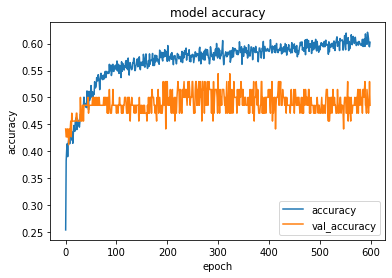

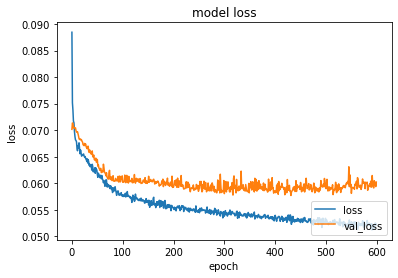

In [20]:
# Histórico de Acurácia (accuracy) em cada época
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['accuracy', 'val_accuracy'], loc='lower right')
plt.show()

# Histórico de Perda (loss) em cada época
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'], loc='lower right')
plt.show()

Pelos gráficos acima, podemos chegar ao entendimento que a perda do modelo poderia ser menor se aumentassemos o número de épocas, assim como a acurácia, que poderia melhorar um pouco mais. 

Contúdo, as melhorias com mais épocas representam um custo maior de treinamento, que no nosso caso, é irrelevante já que o treino ainda está na faixa de minutos e não de horas.

## Conclusão

Por fim, juntamos na tabela abaixo os resultados resumidos:

| Modelo      | Acurácia | Acurácia Treino |
| ----------- | -------- | --------------- |
| KNN         | 0.5882   | 0.6747          |
| Rede Neural | 0.4853   | 0.6258          |

> Obs: Os resultados da Rede Neural podem estar diferentes se você executar várias vezes, visto que, diferente do KNN, ele não produz a mesma acurácia em todas as execuções.

Dessa forma, podemos ver que a acurácia maior foi obtida pelo modelo gerado pelo KNN.

E se compararmos esses resultados com outros modelos criados por outros usuários? Para isso, usamos um outro estudo dentro do Kaggle, [que pode ser encontrado clicando aqui](https://www.kaggle.com/niteshyadav3103/red-wine-quality-classification), rodado sobre o mesmo dataset, e os resultados dele são os seguintes:


| Modelo              | Acurácia | Acurácia Treino |
| ------------------- | -------- | --------------- |
| LGBM                | 0.6975   | N/A             |
| XgBoost             | 0.6925   | N/A             |
| Cat Boost           | 0.6925   | N/A             |
| Extra Tree          | 0.6925   | N/A             |
| Random Forest       | 0.6850   | N/A             |
| Gradient Boosting   | 0.6775   | N/A             |
| SGB                 | 0.6775   | N/A             |
| Decision Tree       | 0.6250   | N/A             |
| SVC                 | 0.6200   | N/A             |
| Logistic Regression | 0.6075   | N/A             |
| SGD                 | 0.6075   | N/A             |
| Ada Boost           | 0.5975   | N/A             |
| KNN                 | 0.5850   | N/A             |

Esses resultados acima usaram todas as colunas fornecidas pelo dataset e sem remover dados duplicados. 

Sobre modelos em comum, temos apenas o KNN, no qual na nossa implementação obteve uma acurácia de 0.5882 que foi um pouco melhor que a acurácia de 0.5850 da implementação do Kaggle.

E sobre a implementação da rede neural, nesse notebook não houve nenhuma criação de rede neural mas se rankearmos todos os modelos do Kaggle e os nossos, a rede neural fica em último lugar abaixo do KNN.
